### 50_days_ML||DL FOR DATA SCIENCE 
  

In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('./placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

----
### Steps

 0. Preprocess + EDA + Feature Selection
 1. Extract input and output cols
 2. Scale the values
 3. Train test split
 4. Train the model
 5. Evaluate the model/model selection
 6. Deploy the model 
-----

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df =df.iloc[:,1:]     #  removed the unnessary columns 

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt

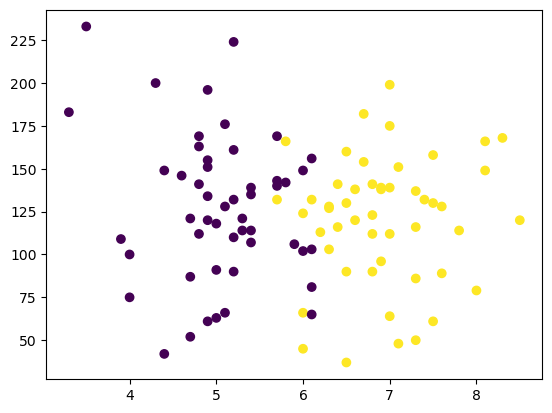

In [9]:
plt.scatter(df['cgpa'],df['iq'] , c=df['placement'])

In [10]:
# Selecting columns for features
X = df.iloc[:, [0, 2]]

# Selecting the last column for the target variable
y = df.iloc[:, -1]


In [11]:
X

,cgpa,placement
0,6.8,1
1,5.9,0
2,5.3,0
3,7.4,1
4,5.8,0
...,...,...
95,4.3,0
96,4.4,0
97,6.7,1
98,6.3,1


In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_trin, X_test, y_train, y_test =train_test_split(X,y ,test_size=0.1)

In [14]:
X_trin

,cgpa,placement
73,4.9,0
34,4.8,0
40,4.9,0
37,8.1,1
17,3.3,0
...,...,...
98,6.3,1
86,5.1,0
15,5.1,0
52,7.0,1


In [15]:
y_train

73    0
34    0
40    0
37    1
17    0
     ..
98    1
86    0
15    0
52    1
25    0
Name: placement, Length: 90, dtype: int64

In [16]:
X_test

,cgpa,placement
38,6.5,1
47,5.2,0
88,4.4,0
95,4.3,0
11,6.9,1
12,5.4,0
84,5.7,0
30,7.6,1
62,6.0,0
67,5.0,0


In [17]:
from sklearn.preprocessing import  StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_trin=scaler.fit_transform(X_trin)

In [20]:
X_trin

array([[-0.9798789 , -1.04547753],
       [-1.06710848, -1.04547753],
       [-0.9798789 , -1.04547753],
       [ 1.81146753,  0.95650071],
       [-2.37555212, -1.04547753],
       [ 0.85194219,  0.95650071],
       [-0.80541975, -1.04547753],
       [-0.2820423 ,  0.95650071],
       [-0.9798789 , -1.04547753],
       [-0.54373102, -1.04547753],
       [ 0.93917177,  0.95650071],
       [-0.71819017, -1.04547753],
       [-1.85217466, -1.04547753],
       [ 0.85194219,  0.95650071],
       [ 0.24133516,  0.95650071],
       [ 2.16038583,  0.95650071],
       [-0.19481272,  0.95650071],
       [-0.6309606 , -1.04547753],
       [-0.9798789 , -1.04547753],
       [ 1.28809007,  0.95650071],
       [ 0.67748304,  0.95650071],
       [ 1.81146753,  0.95650071],
       [-1.24156763, -1.04547753],
       [ 0.06687601, -1.04547753],
       [-1.76494509, -1.04547753],
       [ 1.20086049,  0.95650071],
       [-0.9798789 , -1.04547753],
       [ 0.59025346,  0.95650071],
       [ 1.28809007,

In [21]:
X_test =scaler.transform(X_test)

In [22]:
X_test

array([[ 0.41579431,  0.95650071],
       [-0.71819017, -1.04547753],
       [-1.41602678, -1.04547753],
       [-1.50325636, -1.04547753],
       [ 0.76471262,  0.95650071],
       [-0.54373102, -1.04547753],
       [-0.2820423 , -1.04547753],
       [ 1.37531965,  0.95650071],
       [-0.02035357, -1.04547753],
       [-0.89264933, -1.04547753]])

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression()

In [25]:
clf.fit(X_trin, y_train)

LogisticRegression()

In [26]:
y_pred =clf.predict(X_test)

In [27]:
y_test

38    1
47    0
88    0
95    0
11    1
12    0
84    0
30    1
62    0
67    0
Name: placement, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

1.0

In [30]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

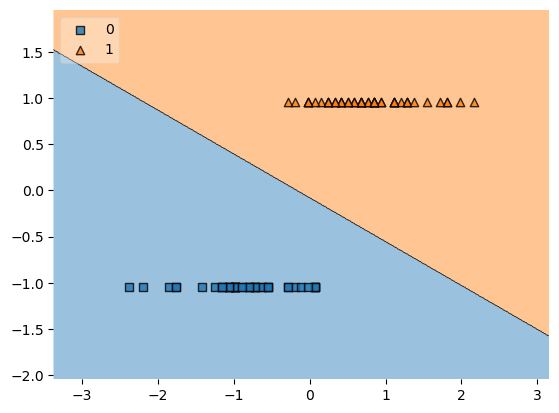

In [31]:
plot_decision_regions(X_trin, y_train.values, clf=clf , legend=2)

In [32]:
import pickle 

In [33]:
pickle.dump(clf,open('model.pkl', 'wb'))